In [ ]:
pip install tensorflow

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence

# Example of fetching the IMDB dataset for NLP
max_features = 10000  # Number of words from the corpus
maxlen = 500  # Length of sequences

print('Fetching data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'training sequences')
print(len(input_test), 'test sequences')

input_test

Fetching data...


25000 training sequences
25000 test sequences


array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [10]:
import numpy as np  # Importing the NumPy library
import tensorflow as tf  # Importing the TensorFlow library
from tensorflow.keras.datasets import imdb  # Importing the IMDb dataset
from tensorflow.keras.models import Sequential  # Importing the Sequential model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense  # Importing model layers
from tensorflow.keras.preprocessing import sequence  # Importing sequence processing module

# Example of fetching the IMDB dataset for NLP
max_features = 10000  # Number of words from the corpus
maxlen = 500  # Length of sequences

print('Fetching data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)  # Loading the IMDb dataset with a limit on the number of words
print(len(input_train), 'training sequences')  # Displaying the number of training sequences
print(len(input_test), 'test sequences')  # Displaying the number of test sequences

# Simple technique for handling text data
print('Preparing data...')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)  # Setting a constant length for training sequences
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)  # Setting a constant length for test sequences
print('input_train shape:', input_train.shape)  # Displaying the shape of training data
print('input_test shape:', input_test.shape)  # Displaying the shape of test data

# Creating an RNN (Recurrent Neural Network) model
model = Sequential()  # Initializing the sequential model
model.add(Embedding(max_features, 32))  # Word embedding layer
model.add(SimpleRNN(32, return_sequences=True))  # RNN layer with returning sequences
model.add(SimpleRNN(32, return_sequences=True))  # Second RNN layer
model.add(SimpleRNN(32, return_sequences=True))  # Third RNN layer
model.add(SimpleRNN(32))  # Last RNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation function

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])  # Compiling the model
print(model.summary())  # Displaying the model summary

# Training the model
history = model.fit(input_train, y_train,
                    epochs=5,  # Number of epochs
                    batch_size=128,  # Batch size
                    validation_split=0.2)  # Splitting data into training and validation

# Example of using the model for prediction
predictions = model.predict(input_test)  # Using the model to predict results

Fetching data...
25000 training sequences
25000 test sequences
Preparing data...
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_12 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_13 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_15 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 276ms/step - acc: 0.5191 - loss: 0.6995 - val_acc: 0.7310 - val_loss: 0.5465
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 265ms/step - acc: 0.8204 - loss: 0.4090 - val_acc: 0.8396 - val_loss: 0.3743
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 266ms/step - acc: 0.9046 - loss: 0.2479 - val_acc: 0.8650 - val_loss: 0.3547
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - acc: 0.9549 - loss: 0.1309 - val_acc: 0.8528 - val_loss: 0.4697
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - acc: 0.9737 - loss: 0.0783 - val_acc: 0.8472 - val_loss: 0.5621
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step


In [11]:
input_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [  33,    6,   58, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

In [12]:
predictions

array([[0.8128515 ],
       [0.9941591 ],
       [0.52467686],
       ...,
       [0.014939  ],
       [0.00752917],
       [0.11982151]], dtype=float32)

In [13]:
from tensorflow.keras.datasets import reuters  # Importing the Reuters dataset
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Data preparation
max_features = 10000
maxlen = 500

print('Downloading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

print('Preparing data...')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train)  # Convert to categorical encoding
y_test = to_categorical(y_test)

# Displaying data information
print(f"Number of training sequences: {len(x_train)}")
print(f"Number of test sequences: {len(x_test)}")
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of test data: {x_test.shape}")


Preparing data...
Number of training sequences: 8982
Number of test sequences: 2246
Shape of training data: (8982, 500)
Shape of test data: (2246, 500)


In [ ]:
reuters

1. **Data Preparation:**
   - Load the Reuters dataset, as you've already done.
   - Pad sequences to ensure they all have the same length.
   - Optionally, explore the data structure to understand their layout, such as the number of samples or the distribution of categories.

2. **Building the RNN Model:**
   - Create a sequential model.
   - Add an Embedding layer to transform word indices into dense vectors of fixed size, which is a more efficient representation than one-hot vectors.
   - Add one or more LSTM layers. LSTM (Long Short-Term Memory) is a type of RNN that is particularly good at capturing long-term dependencies in sequential data.
   - Add a Dense layer with 46 units (one for each category) and a softmax activation function for multi-class classification.

3. **Compiling the Model:**
   - Compile the model with an appropriate optimizer (e.g., 'rmsprop').
   - Use 'sparse_categorical_crossentropy' as the loss function, as this is a multi-class classification problem and our labels are integers.
   - Add 'accuracy' as a metric to monitor during training.

4. **Training the Model:**
   - Train the model on the training data using `model.fit`. Choose a reasonable number of epochs and batch size.
   - Use a portion of the training data as a validation set.

5. **Evaluating and Testing the Model:**
   - Evaluate the model's performance on the test set using `model.evaluate`.
   - Analyze the results to understand how well the model performs.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Create a sequential model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(max_features, 32, input_length=maxlen))

# Add an LSTM layer
model.add(LSTM(32))

# Add a Dense layer with 46 units and softmax activation function
model.add(Dense(46, activation='softmax'))

# Compile the model with the appropriate optimizer, loss function, and metric
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Change y_train to indices
y_train_indices = np.argmax(y_train, axis=1)
# Change y_test to indices
y_test_indices = np.argmax(y_test, axis=1)

# Compile the model with the appropriate parameters
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary again after compilation
print(model.summary())
print(y_train_indices)


/home/tobi303/anaconda3/envs/PyEnv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
[ 3  4  3 ... 25  3 25]


In [16]:
# Training the model
history = model.fit(x_train, y_train_indices,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)


# Example of using the model for prediction
predictions = model.predict(x_test)  # Using the model to make predictions

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.3299 - loss: 3.2560 - val_accuracy: 0.3450 - val_loss: 2.4305
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.3746 - loss: 2.3363 - val_accuracy: 0.4819 - val_loss: 2.0911
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.4758 - loss: 2.0627 - val_accuracy: 0.5014 - val_loss: 1.8991
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.4929 - loss: 1.9388 - val_accuracy: 0.5120 - val_loss: 1.8910
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.5363 - loss: 1.8019 - val_accuracy: 0.5537 - val_loss: 1.7215
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


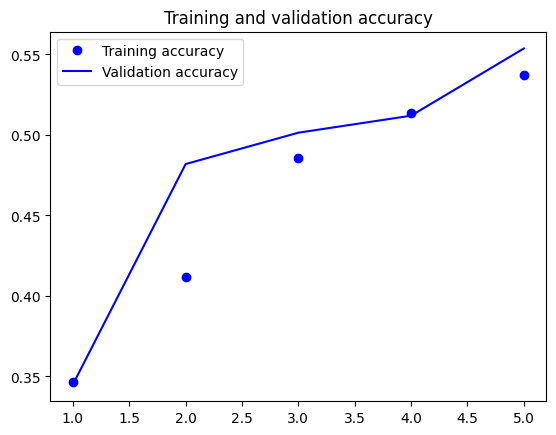

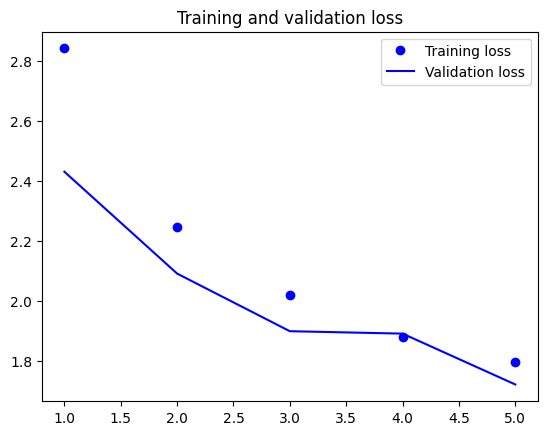

In [17]:
# Displaying learning curves
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_indices)

print(f"\nTest loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Predicting classes for the test set
predictions = model.predict(x_test)

# Converting results from one-hot encoding to class indices
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = np.argmax(y_test, axis=1)

# Analysis of results
from sklearn.metrics import classification_report, confusion_matrix

# Displaying the classification report
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels))

# Displaying the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:\n", conf_matrix)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5605 - loss: 1.7466

Test loss: 1.7568
Test accuracy: 0.5525
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.93      0.91      0.92       813
           4       0.76      0.80      0.78       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
         

/home/tobi303/anaconda3/envs/PyEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tobi303/anaconda3/envs/PyEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tobi303/anaconda3/envs/PyEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r